In [2]:
from nba_api.stats.endpoints import leagueleaders

df = leagueleaders.LeagueLeaders().get_data_frames()[0]

In [27]:
def calculate_trueshooting(row):
    if row['FGA'] == 0:
        return None
    else:
        return row['PTS'] / (2 * (row['FGA'] + 0.44 * row['FTA']))
    


df['TS%'] = df.apply(calculate_trueshooting, axis=1)



In [100]:
league_average = df['PTS'].sum() / (2 * (df['FGA'].sum() + 0.44 * df['FTA'].sum()))

def calculate_fgadd(row):
    #true shoot add is the players true shooting multiplied by shots taken
    if row['TS%'] == None:
        return None
    else:
        return (row['TS%']-league_average) * (row['FGA'] * 2 + row['FTA'])
df['fgadd'] = df.apply(calculate_fgadd, axis=1)

df = df.sort_values(by='fgadd', ascending=False)

def calculate_fga_mult_ts(row):
    #true shoot add is the players true shooting multiplied by shots taken
    if row['TS%'] == None:
        return None
    else:
        return row['TS%'] * (row['FGA'] * 2 + row['FTA'])
# df['tstotal'] = df.apply(calculate_fga_mult_ts, axis=1)

# df = df.sort_values(by='fgaadd', ascending=False)

# save the top 30 players to a csv file in a folder called data
# the name of the file should be top_30_players{year}.csv

# df.head(30).to_csv('data/top_30_players{}.csv'.format(df[]), index=False)


In [ ]:
#do this for the last 20 years

league_average_dict = {}


for year in range(1980, 2024):
    df = leagueleaders.LeagueLeaders(season="{}-{}".format(year, str(year+1)[2:])).get_data_frames()[0]
    if df.empty:
        print("empty df for year")
    df['TS%'] = df.apply(calculate_trueshooting, axis=1)
    league_average = df['PTS'].sum() / (2 * (df['FGA'].sum() + 0.44 * df['FTA'].sum()))
    league_average_dict[year] = league_average
    df['fgadd'] = df.apply(calculate_fgadd, axis=1)
    df["tstotal"] = df.apply(calculate_fga_mult_ts, axis=1)
    df = df.sort_values(by='fgadd', ascending=False)
    df.head(30).to_csv('data/top_30_players{}.csv'.format(year), index=False)


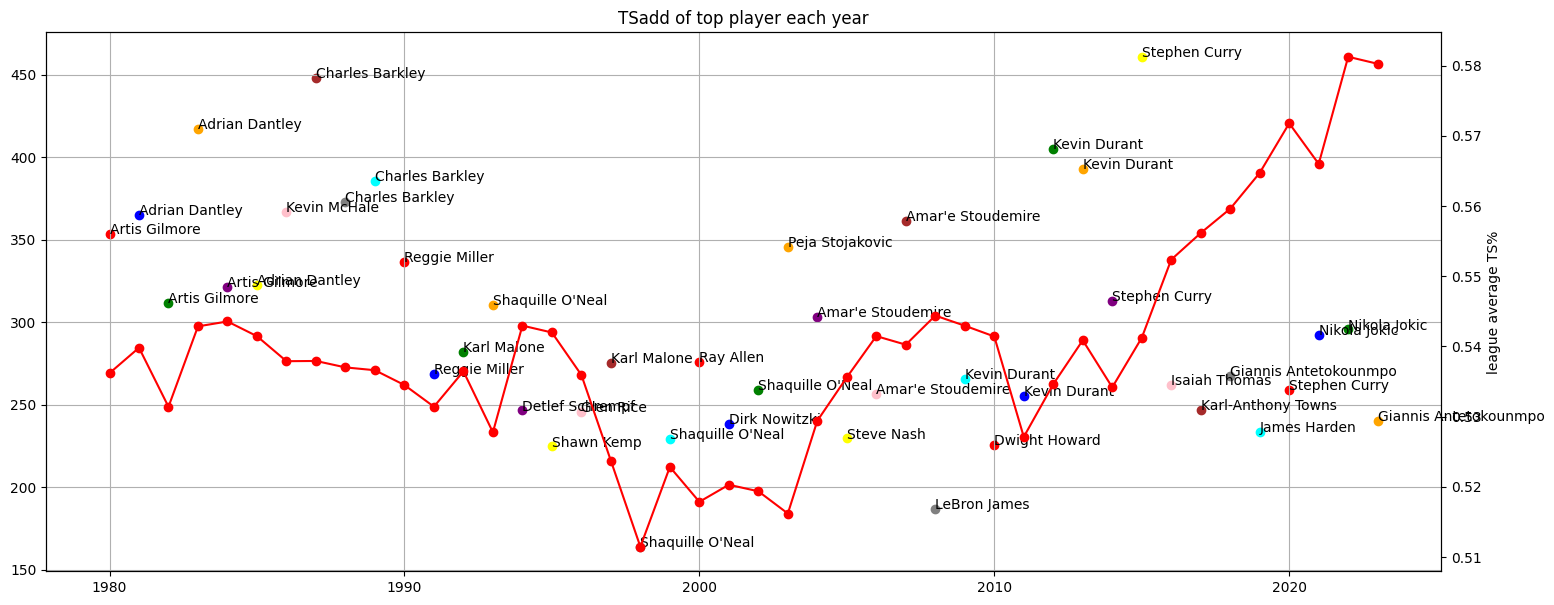

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd


# # #plot league_average on the same plot from the league_average_dict, but on a seperate axis
# fig, ax = plt.subplots()
# for year in range(1980, 2024):
#     df = pd.read_csv('data/top_30_players{}.csv'.format(year))
#     #color different players differently
#     ax.scatter(year, df.iloc[0]['fgadd'], color= "blue" )
#     ax.annotate(df.iloc[0]['PLAYER'], (year, df.iloc[0]['fgadd']), fontsize=8)
# plt.grid()
# import matplotlib.pyplot as plt
# # plot league_average on the same plot from the league_average_dict, but on a separate axis
fig, ax = plt.subplots( figsize=(18, 7) )

# Create a list of colors for each player
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan']

for year in range(1980, 2024):
    df = pd.read_csv('data/top_30_players{}.csv'.format(year))
    # color different players differently
    ax.scatter(year, df.iloc[0]['fgadd'], color=colors[(year-1980) % len(colors) ])
   
    ax.annotate(df.iloc[0]['PLAYER'], (year, df.iloc[0]['fgadd']), fontsize=10)

plt.grid()

# plot the league average on the same plot, but use a separate axis
ax2 = ax.twinx()
ax2.plot(league_average_dict.keys(), league_average_dict.values(), 'ro-')

plt.xlabel('Year')
plt.ylabel('league average TS%')
plt.title('TSadd of top player each year')
#make the labels bigger
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# save the plot to a file called fgadd.png
fig.savefig('tstotal.png')




In [206]:
from nba_api.stats.static import teams

team_dict = {}


teams.find_teams_by_year_founded(1980)

for year in range(1940, 2005):
    temp_list = []
    year_teams = teams.find_teams_by_year_founded(year)
    for team in year_teams:
        temp_list.append((team['full_name'], get_team_color(team['full_name'])))
    team_dict[year] = temp_list

    
 


In [174]:
print([[tms] for tms in team_dict.values()])

[[['Boston Celtics', 'Golden State Warriors', 'New York Knicks', 'Los Angeles Lakers', 'Sacramento Kings', 'Detroit Pistons', 'Atlanta Hawks', 'Philadelphia 76ers', 'Washington Wizards', 'Chicago Bulls', 'Houston Rockets', 'Oklahoma City Thunder', 'Milwaukee Bucks', 'Phoenix Suns', 'Cleveland Cavaliers', 'Los Angeles Clippers', 'Portland Trail Blazers', 'Utah Jazz', 'Denver Nuggets', 'Brooklyn Nets', 'Indiana Pacers', 'San Antonio Spurs', 'Dallas Mavericks', 'Miami Heat', 'Charlotte Hornets', 'Minnesota Timberwolves', 'Orlando Magic', 'Toronto Raptors', 'Memphis Grizzlies', 'New Orleans Pelicans']], [['Boston Celtics', 'Golden State Warriors', 'New York Knicks', 'Los Angeles Lakers', 'Sacramento Kings', 'Detroit Pistons', 'Atlanta Hawks', 'Philadelphia 76ers', 'Washington Wizards', 'Chicago Bulls', 'Houston Rockets', 'Oklahoma City Thunder', 'Milwaukee Bucks', 'Phoenix Suns', 'Cleveland Cavaliers', 'Los Angeles Clippers', 'Portland Trail Blazers', 'Utah Jazz', 'Denver Nuggets', 'Brookl

In [186]:
# import team_colors_dict from team_colors.py
from team_colors import team_colors_dict

In [202]:
# grab all the 'full_name' keys from a list of dictionaries
# team_colors_dict


# write a function that takes in a team name and returns the team's color from the team_colors_dict
#the dict has structure {"conference" : {"team_name": "color"}}

def get_team_color(team_name):
    for conference, teams in team_colors_dict.items():
        for team, color in teams.items():
            #make both lowercase to compare
            if team.lower() == team_name.lower():
                return color[0]
    return None


In [201]:
get_team_color('Los Angeles Lakers')

'Purple'

In [196]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sample data for demonstration: Team name, founding year, and primary color
teams_data = [
    ("Boston Celtics", 1946, "#007A33"),
    ("Los Angeles Lakers", 1947, "#552583"),
    ("Golden State Warriors", 1946, "#1D428A"),
    ("Chicago Bulls", 1966, "#CE1141"),
    ("Miami Heat", 1988, "#98002E"),
    ("Toronto Raptors", 1995, "#CE1141")
]

# Organizing the data by year for plotting
for team, year, color in teams_data:
    if year in years_dict:
        years_dict[year].append((team, color))
    else:
        years_dict[year] = [(team, color)]

# Sorting years for sequential plotting
years = sorted(years_dict.keys())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
y_offset = 0  # Keep track of the y offset for each block

for year in years:
    teams_in_year = years_dict[year]
    for team, color in teams_in_year:
        ax.add_patch(patches.Rectangle((year, y_offset), 1, 1, color=color))
        y_offset += 1
    y_offset += 0.5  # Add space between years

# Setting the plot limits and labels
plt.xlim(min(years) - 1, max(years) + 1)
plt.ylim(0, y_offset)
plt.xlabel("Year")
plt.ylabel("Teams Founded")
plt.title("NBA Teams Founded by Year")

# Improving the y-axis: Hide y-axis labels (optional)
plt.yticks([])

plt.show()

Atlanta Hawks
Boston Celtics
Brooklyn Nets
Charlotte Hornets
Chicago Bulls
Cleveland Cavaliers
Detroit Pistons
Indiana Pacers
Miami Heat
Milwaukee Bucks
New York Knicks
Orlando Magic
Philadelphia 76ers
Toronto Raptors
Washington Wizards
Dallas Mavericks
Denver Nuggets
Golden State Warriors
Houston Rockets
Los Angeles Clippers
Los Angeles Lakers
Memphis Grizzlies
Minnesota Timberwolves
New Orleans Pelicans
Oklahoma City Thunder
Phoenix Suns
Portland Trail Blazers
Sacramento Kings
San Antonio Spurs
Utah Jazz
